In this version,
- Training pipline of the selection mechanism





In [1]:
import tensorflow as tf
print("Tensorflow version: ",tf.__version__)

c:\Users\mona\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\mona\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\mona\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Tensorflow version:  2.7.0


In [2]:
# Checking if cuda is there.
print("Cuda Availability: ", tf.test.is_built_with_cuda())

# Checking GPU is available or not.
print("GPU  Availability: ", tf.test.is_gpu_available())

# Check nos of GPUS
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Cuda Availability:  True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU  Availability:  True
Num GPUs Available:  1


# Data Downloading

In [3]:
# choose the dataset version and paths
# 'modelnet40v1' or 'modelnet40v2' or 'shaded_modelnet40v2'
##########################
dataset_version= 'modelnet40v1' 
dataset_train = 'C:/Users/mona/Desktop/data/modelnet40v1_train'

#dataset_version= 'modelnet40v2'
#dataset_train = 'C:/Users/mona/Desktop/data/modelnet40v2_train'

#dataset_version= 'shaded_modelnet40v2'
#dataset_train = 'C:/Users/mona/Desktop/data/modelnet40v2_train'

In [ ]:
# spicify the img size (here 224*224)
Img_Size= 224 

# Data Processing


We've included helper functions that will label images, convert them into arrays, and then finally into a generator that will enable them to be loaded into the model in batches

In [4]:
# for training and testing
##########################

import random #Python Random module is an in-built module of Python which is used to generate random numbers.
from random import shuffle #is an inbuilt method of the random module. It is used to shuffle a sequence (list). Shuffling a list of objects means changing the position of the elements of the sequence
import cv2 # OpenCV-Python is a library of Python bindings designed to solve computer vision problems.
import os # Python OS module provides the facility to establish the interaction between the user and the operating system. It offers many useful OS functions that are used to perform OS-based tasks and get related information about operating system.
from tqdm import tqdm # is a library in Python which is used for creating Progress Meters or Progress Bars. tqdm got its name from the Arabic name taqaddum which means 'progress'
import matplotlib.pyplot as plt #Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible. Create publication quality plots. Make interactive figures that can zoom, pan, update. Customize visual style and layout.
import numpy as np #NumPy (Numerical Python) is an open-source library for the Python programming language. It is used for scientific computing and working with arrays.
from tensorflow.python.keras.utils.data_utils import Sequence #Keras and TensorFlow are open source Python libraries for working with neural networks, creating machine learning models and performing deep learning
# keras.utils This package provides utilities for Keras, such as modified callbacks, genereators, etc.
import tensorflow as tf


In [5]:
# for training and testing
##########################

#For shuffling or any thing random
import random #Python Random module is an in-built module of Python which is used to generate random numbers.
from random import shuffle #is an inbuilt method of the random module. It is used to shuffle a sequence (list). Shuffling a list of objects means changing the position of the elements of the sequence
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
# for training and testing
##########################

global num_views

if dataset_version == 'modelnet40v1':
    num_views = 12
elif dataset_version == 'modelnet40v2':
    num_views = 20
elif dataset_version == 'shaded_modelnet40v1':
    num_views = 12

print ("number of views is " + str(num_views))

number of views is 20


In [ ]:
# for training and testing
##########################


def extract_View_No(img): # function to extract the view no
  ## Helper for process_data
  ViewNo =img[-6:-4] #take the last 2 characters from the img name before the ".png"
  if ViewNo == '01': return 1
  elif ViewNo == '02': return 2
  elif ViewNo == '03': return 3
  elif ViewNo == '04': return 4
  elif ViewNo == '05': return 5
  elif ViewNo == '06': return 6
  elif ViewNo == '07': return 7
  elif ViewNo == '08': return 8
  elif ViewNo == '09': return 9
  elif ViewNo == '10': return 10
  elif ViewNo == '11': return 11
  elif ViewNo == '12': return 12
  elif ViewNo == '13': return 13
  elif ViewNo == '14': return 14
  elif ViewNo == '15': return 15
  elif ViewNo == '16': return 16
  elif ViewNo == '17': return 17
  elif ViewNo == '18': return 18
  elif ViewNo == '19': return 19
  elif ViewNo == '20': return 20
  #print(ViewNo)


def label_image_encoder(img): # function to label image
  ## Helper for process_data
  label = img.split('_')[0] # from the image name, take the part before "_" and consider it as label #split() method is a beneficial tool for manipulating strings. It returns a list of strings after the main string is separated by a delimiter.
  if label == 'airplane': return 0 # encode airplane label as 0
  elif label == 'bathtub': return 1 # encode bathtub label as 1
  elif label == 'bed': return 2 # encode bed label as 2
  elif label == 'bench': return 3 # encode bench label as 3
  elif label == 'bookshelf': return 4 # encode bookshelf label as 4
  elif label == 'bottle': return 5 # encode bottle label as 5
  elif label == 'bowl': return 6 # encode bowl label as 6
  elif label == 'car': return 7 # encode car label as 7
  elif label == 'chair': return 8 # encode chair label as 8
  elif label == 'cone': return 9 # encode cone label as 9
  elif label == 'cup': return 10 # encode cup label as 10
  elif label == 'curtain': return 11 # encode curtain label as 11
  elif label == 'desk': return 12 # encode desk label as 12
  elif label == 'door': return 13 # encode door label as 13
  elif label == 'dresser': return 14 # encode dresser label as 14
  elif label == 'flower': return 15 # encode floer_pot label as 15
  elif label == 'glass': return 16 # encode glass_box label as 16
  elif label == 'guitar': return 17 # encode guitar label as 17
  elif label == 'keyboard': return 18 # encode keyboard label as 18
  elif label == 'lamp': return 19 # encode lamp label as 19
  elif label == 'laptop': return 20 # encode laptop label as 20
  elif label == 'mantel': return 21 # encode mantel label as 21
  elif label == 'monitor': return 22 # encode monitor label as 22
  elif label == 'night': return 23 # encode night_stand label as 23
  elif label == 'person': return 24 # encode person label as 24
  elif label == 'piano': return 25 # encode piano label as 25
  elif label == 'plant': return 26 # encode plant label as 26
  elif label == 'radio': return 27 # encode radio label as 27
  elif label == 'range': return 28 # encode range_hood label as 28
  elif label == 'sink': return 29 # encode sink label as 29
  elif label == 'sofa': return 30 # encode sofa label as 30
  elif label == 'stairs': return 31 # encode stairs label as 31
  elif label == 'stool': return 32 # encode stool label as 32
  elif label == 'table': return 33 # encode table label as 33
  elif label == 'tent': return 34 # encode tent label as 34
  elif label == 'toilet': return 35 # encode toilet label as 35
  elif label == 'tv': return 36 # encode tv_stand label as 36
  elif label == 'vase': return 37 # encode vase label as 37
  elif label == 'wardrobe': return 38 # encode wardrobe label as 38
  elif label == 'xbox': return 39 # encode xbox label as 39


def process_data(image_list, DATA_FOLDER, IMG_SIZE): # function that take the images, the data folder name, and the wanted image size, and retun the list of images as arrays with there labels and paths
  ## Helper for manual_pre_process
  ## Creates an array of images, labels, and file path
  data_df = [] #[] is a list: A multible collection of values, here define new array
  for img in tqdm(image_list): # tqdm . It will display a progress bar of the for loop, for each image in image_list do the following
    path = os.path.join(DATA_FOLDER, img) # concatenates various path components with exactly one directory separator ('/'), concatenate DATA_FOLDER path then / then the image name to create an image's path
    ViewNo = extract_View_No(img) # extract the view no
    label = label_image_encoder(img) # use the above function to encode the image's label
    img = cv2.imread(path, cv2.IMREAD_COLOR) # cv2. imread() method loads an image from the specified file. IMREAD_COLOR reads the image with RGB colors but no transparency channel, load image from its path
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) # Resizing the image img, by only change the width=IMG_SIZE and height=IMG_SIZE of the image, this step to make all image with the same size
    #data_df.append([np.array(img), np.array(label), path]) #Append in Python is a pre-defined method used to add a single item to certain collection types. so, append the list data_df by adding sum-list with 3 element for each image [np.array(img)=image as array, np.array(label)=image's label as 0 or 1, path=image's path]it
    data_df.append([np.array(img), np.array(label), ViewNo, path]) #Append in Python is a pre-defined method used to add a single item to certain collection types. so, append the list data_df by adding sum-list with 3 element for each image [np.array(img)=image as array, np.array(label)=image's label as 0 or 1, path=image's path]it

  return data_df # return the data_df list after process it


def manual_pre_process(dir, IMG_SIZE):
  '''
  Creates an array of images, labels, and files from a directory of image files

  Args:
    dir: string, folder name
    IMG_SIZE: int, image height and width

  Returns
    X: (n x IMG_SIZE x IMG_SIZE) numpy array of images
    y: (n,) numpy array of labels
    files: (n,) numpy array of files

  '''
  image_lst = sorted(os.listdir(dir)) # get the list of all files and directories in the specified directory "dir"
  data_df = process_data(image_lst, dir, IMG_SIZE) # take the images, the data folder name, and the wanted image size, and retun the list of images after processing as arrays with there labels and paths
  X = np.array([i[0] for i in data_df]).reshape(-1, IMG_SIZE, IMG_SIZE, 3) # take the images only (as arrays) from data_df and save them as X (the input images)
  y = np.array([i[1] for i in data_df]) # take the labels only from data_df and save them as Y (the actual labels)
  ViewNos = np.array([i[2] for i in data_df]) # take the ViewNo only from data_df and save them as ViewNo
  files = np.array([i[3] for i in data_df]) # take the images' paths only from data_df and save them as files
  return X, y, ViewNos, files # return X=the images(as arrays), y=the actual labels, and files=the images' paths


In [ ]:
# for training and testing
##########################


# Dictionary
class_info = {0: 'airplane',
              1: 'bathtub',
              2: 'bed',
              3: 'bench',
              4: 'bookshelf',
              5: 'bottle',
              6: 'bowl',
              7: 'car',
              8: 'chair',
              9: 'cone',
              10: 'cup',
              11: 'curtain',
              12: 'desk',
              13: 'door',
              14: 'dresser',
              15: 'flower_pot',
              16: 'glass_box',
              17: 'guitar',
              18: 'keyboard',
              19: 'lamp',
              20: 'laptop',
              21: 'mantel',
              22: 'monitor',
              23: 'night_stand',
              24: 'person',
              25: 'piano',
              26: 'plant',
              27: 'radio',
              28: 'range_hood',
              29: 'sink',
              30: 'sofa',
              31: 'stairs',
              32: 'stool',
              33: 'table',
              34: 'tent',
              35: 'toilet',
              36: 'tv_stand',
              37: 'vase',
              38: 'wardrobe',
              39: 'xbox'} # define a dictionary (a key/value mapping) of the labels




X_train, y_train, ViewNo_train, files_train = manual_pre_process(dataset_train, Img_Size)


In [ ]:
# for training and testing
##########################

from keras.utils.np_utils import to_categorical
categorical_y_train = to_categorical(y_train, 40)

In [ ]:
#for training
########################

train_NoOfSamples, h, w, channel= y_train.shape[0], 224, 224, 3

print("Number of training Samples is")
print(train_NoOfSamples)

In [ ]:
# for training
##########################
# Note: spicify the subplot rows and columns based on the number of views
##########################


# show the (12 or 20 views) of one object samples before feature extraction
plt.figure(figsize=(15, 15)) # create a fig of size 15*15


for i in range(0,num_views):
 img = X_train[i] #take sample image
 label = y_train[i] #take the label of the sample image
 viewNo= ViewNo_train[i]
 path = files_train[i] #take the path of the sample image

 ax = plt.subplot(4, 5, i +1) # for 20 views
 #ax = plt.subplot(3, 4, i +1) # For 12 views
 plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # show the img in the plot
 plt.axis('off') # remove the axis
 category = class_info[label.item()] # convert the label from ndarray to int then bring its class
 title= category.capitalize() + ', View No:' + str(viewNo)
 plt.title(title) # show the title above the img

# Training the Pre-trained Model (Stage 1)

In [8]:
# for training and testing
##########################

# Loading the Pre-Trained Model
# Upload the required libraries

from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input
import time
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from tqdm import tqdm

# keras imports
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.applications.xception import Xception, preprocess_input
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import DenseNet169
from keras.applications.densenet import DenseNet201
from keras.applications.nasnet import NASNetLarge
from keras.applications.nasnet import NASNetMobile
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.resnet import ResNet50
from keras.applications.resnet import ResNet101
from keras.applications.resnet import ResNet152
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.resnet_v2 import ResNet101V2
from keras.applications.resnet_v2 import ResNet152V2

# filter warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.applications.xception import Xception, preprocess_input
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.applications.efficientnet import EfficientNetB0, preprocess_input
from keras.applications.efficientnet import EfficientNetB1, preprocess_input
from keras.applications.efficientnet import EfficientNetB2, preprocess_input
from keras.applications.efficientnet import EfficientNetB3, preprocess_input
from keras.applications.efficientnet import EfficientNetB4, preprocess_input
from keras.applications.efficientnet import EfficientNetB5, preprocess_input
from keras.applications.efficientnet import EfficientNetB6, preprocess_input
from keras.applications.efficientnet import EfficientNetB7, preprocess_input

from keras.preprocessing import image
from keras.models import Model
from keras.models import model_from_json
from keras.layers import Input
from keras.layers import Dense,GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from pycm import *
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from numpy import array
from sklearn.model_selection import KFold

from tqdm import tqdm_notebook as tqdm
from keras_tqdm import TQDMNotebookCallback
from keras_tqdm import TQDMCallback
#from keras_preprocessing.image import load_img
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import gradient_descent_v2
from keras.optimizers import adam_v2
from keras.layers import MaxPooling2D

import keras
from tensorflow import keras
from keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from keras.layers import Flatten
from tensorflow.keras.layers import ( # from tensorflow.keras.layers 
     BatchNormalization, Flatten, Dropout, Dense #,BatchNormalization, SeparableConv2D, Activation, 
)
from tensorflow.keras.utils import plot_model ## from tensorflow.keras.utils 
from PIL import Image

In [9]:
# for training and testing
##########################


def plot_acc_loss(history, PLOT_NAME,model_name_txt):
    fig = plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.savefig("C:/Users/mona/Desktop/Results/"+str(dataset_version)+"/"+str(model_name_txt)+"/"+str(PLOT_NAME))
    plt.show()

def getPrediction(preds): # preds is the otput scors from softmax
  im_class= np.argmax(preds, axis = 0) # the index as an array of one element , argmax Returns the indices of the maximum values along an axis
  #"the index of the class"
  idx= im_class
  #"the probability is"
  propability= preds[idx]
  # the class label
  label= class_info[idx]
  return idx, label, propability

In [ ]:
#all_deep_models = [VGG16, VGG19, MobileNet, InceptionV3, InceptionResNetV2, Xception, DenseNet121, DenseNet169, DenseNet201, NASNetMobile, MobileNetV2, ResNet50, ResNet101, ResNet152, ResNet50V2, ResNet101V2, ResNet152V2, NASNetLarge ]
#all_model_name_txt = ["VGG16", "VGG19", "MobileNet", "InceptionV3", "InceptionResNetV2", "Xception", "DenseNet121", "DenseNet169", "DenseNet201", "NASNetMobile", "MobileNetV2",  "ResNet50", "ResNet101", "ResNet152", "ResNet50V2", "ResNet101V2", "ResNet152V2", "NASNetLarge"]


In [10]:
# for training and testing
##########################
# Note: spicify the deep model name
##########################


all_deep_models = [ResNet152]
all_model_name_txt = ["ResNet152"]


In [11]:
# for training and testing
##########################
# Note: spicify the BATCH_SIZE based on the number of views
#       spicify the img size that expected by the deep model
##########################


CLASSES = 40
WIDTH = Img_Size
HEIGHT = Img_Size
BATCH_SIZE = 384 #192 #20 shapes with a total of 400 views (20*20 =400) for 20-views version,  and 32 shapes with a total of 384 views (32*12 =384)) for 12-views version
EPOCHS = 20 # 10
learning_rate = 0.0001

In [12]:
from tensorflow.keras.utils import Sequence
import numpy as np   

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y

#test_gen = DataGenerator(X_test, y_test, 32)

In [13]:
from tensorflow.keras.utils import Sequence
import numpy as np   

class DataGenerator1(Sequence):
    def __init__(self, x_set, batch_size):
        self.x = x_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x

In [ ]:
# for training
##########################
# Note: spicify the shape of the input
##########################

## pre-training



i=0
for deep_model in all_deep_models:
    model_name = deep_model
    model_name_txt = str(all_model_name_txt[i])
    print ("- Deep model: "+str(model_name_txt))


    FOLD_NAME = str(model_name_txt)+".txt"
    Train_TimeFOLD_NAME = "TrainingTime_stage1_"+str(model_name_txt)+".txt"
    PLOT_NAME = "plot_acc_loss_stage1"+".png"

     # setup model
    base_model = model_name(weights='imagenet', include_top=False, input_tensor=Input(shape=(Img_Size, Img_Size, 3)))
    model= base_model



    print ("# Final model architecture")
    model.summary()

    print ("# Final model architecture plotted")
    plot_model(model, to_file='model_1.png', rankdir='TB',show_dtype=True, show_layer_names=True)
    ploted_model_path = "C:/Users/mona/Desktop/data/model_1.png"  # Image file path
    ploted_model_img = Image.open(ploted_model_path)
    ploted_model_new_path = "C:/Users/mona/Desktop/Results/"+str(dataset_version)+"/"+str(model_name_txt)+"/"+str(model_name_txt)+"_model_stage1.png"
    ploted_model_img.save(ploted_model_new_path) # Image saving to another directory


    MODEL_FILE = "C:/Users/mona/Desktop/Results/"+str(dataset_version)+"/"+str(model_name_txt)+"/"+str(model_name_txt)+"_stage1.model"
    model.save(MODEL_FILE)
    model_1 = load_model(MODEL_FILE)

    i+=1



In [ ]:
model_1.summary()

## Feature Extraction

In [ ]:
# extract and save the features incrementally as baches and clear the memory occupied by the previous batches.

from tensorflow.keras.models import Model
from tensorflow.keras import backend as K


# Constants
batch_size = 100
output_directory = "C:/Users/mona/Desktop/data/"

# Calculate the number of batches
num_images = train_NoOfSamples
num_batches = int(np.ceil(num_images / batch_size))

# Initialize an empty list to store features
all_features = []

# Iterate through each batch
#for i in range(1500, 1969):
for i in range(num_batches):
    start_index = i * batch_size
    end_index = min((i + 1) * batch_size, num_images)

    # Initialize an empty list to store features in the current batch
    batch_features = []

    # Save images in the current batch as features
    for j in range(start_index, end_index):
        batch_features.append(X_train[j])

    # Convert batch features list to a NumPy array
    batch_features = np.array(batch_features)

    # Extract features of the the current batch using the model
    batch_features = model_1.predict(batch_features, verbose=1) 

    # Append batch features to the list of all features
    all_features.append(batch_features)

    # Clear session to free up GPU memory
    K.clear_session() # a K.clear_session() call after each batch to clear the TensorFlow session and free up GPU memory. 

    print(f"Batch {i+1}/{num_batches} processed.")

    # Save features after every 10 batches (adjust as needed)
    if (i+1) % 10 == 0 or (i+1) == num_batches:
        # Concatenate all batches of features into a single NumPy array
        all_features = np.concatenate(all_features)

        # Save features to a separate file
        output_file = f"C:/Users/mona/Desktop/data/features_batch_{i+1}.npy"
        np.save(output_file, all_features) # This allows you to save the features incrementally and clear the memory occupied by the previous batches.
        # Clear the list of features to save memory
        all_features = []

print("Feature extraction completed.")

In [8]:
# Grouping training features into a single NumPy array.

import numpy as np

# Calculate the number of batches
batch_size=100
num_images = train_NoOfSamples
num_batches = int(np.ceil(num_images / batch_size))
#num_batches = 1969  # Total number of batches
batch_interval = 10  # Interval between batches

# Initialize an empty list to store features
all_training_features = []

# Iterate through each batch
for i in range(1, num_batches + 1):
    # Check if the current batch is within the desired interval
    if i % batch_interval == 0:
        # Load features from the file
        #features_file = f"C:/Users/mona/Desktop/data/features_batch_{i}.npy"
        features_file = f"D:/ResNet-152/features_batch_{i}.npy"
        batch_features = np.load(features_file).astype(np.float16)

        # Append batch features to the list of all features
        all_training_features.append(batch_features)
        print("features_batch_",str(i)," is appended")

        if i == 1960: # the batch before the last batch
            #features_file = f"C:/Users/mona/Desktop/data/features_batch_1969.npy"
            features_file = f"D:/ResNet-152/features_batch_1969.npy"
            batch_features = np.load(features_file)
            # Append batch features to the list of all features
            all_training_features.append(batch_features)
            print("features_batch_1969 is appended")

    

# Concatenate all batches of features into a single NumPy array
all_training_features = np.concatenate(all_training_features)

# Save all features to a single NumPy array file
output_file = "C:/Users/mona/Desktop/data/all_training_features.npy"
np.save(output_file, all_training_features)

print("All training features are grouped into a single NumPy array.")

# The objects must then be expanded from a 3D array to a 4D array with the dimensions [samples, rows, cols, channels]
print("Shape:", all_training_features.shape) # VGG16 Shape: (196860, 7, 7, 512)
print("Data type:", all_training_features.dtype)

features_batch_ 10  is appended
features_batch_ 20  is appended
features_batch_ 30  is appended
features_batch_ 40  is appended
features_batch_ 50  is appended
features_batch_ 60  is appended
features_batch_ 70  is appended
features_batch_ 80  is appended
features_batch_ 90  is appended
features_batch_ 100  is appended
features_batch_ 110  is appended
features_batch_ 120  is appended
features_batch_ 130  is appended
features_batch_ 140  is appended
features_batch_ 150  is appended
features_batch_ 160  is appended
features_batch_ 170  is appended
features_batch_ 180  is appended
features_batch_ 190  is appended
features_batch_ 200  is appended
features_batch_ 210  is appended
features_batch_ 220  is appended
features_batch_ 230  is appended
features_batch_ 240  is appended
features_batch_ 250  is appended
features_batch_ 260  is appended
features_batch_ 270  is appended
features_batch_ 280  is appended
features_batch_ 290  is appended
features_batch_ 300  is appended
features_batch_ 310

In [14]:
# Load all features to a single NumPy array file

features_file = "C:/Users/mona/Desktop/data/all_training_features.npy"
all_training_features = np.load(features_file)

print("All training features are load into a single NumPy array.")

# Verify the shape and data type of the loaded array
print("Shape:", all_training_features.shape) # VGG16 Shape: (196860, 7, 7, 2,048) = 19755294720
print("Data type:", all_training_features.dtype)

All training features are load into a single NumPy array.
Shape: (196860, 7, 7, 2048)
Data type: float32


# Convert views to feature vectors

https://towardsdatascience.com/image-similarity-detection-in-action-with-tensorflow-2-0-b8d9a78b2509

An image feature vector is a list of numbers that represents a whole image, typically used for image similarity calculations or image classification tasks.


## Feature vectors using flatten

In [15]:
#Run 3:
########################

import numpy as np

# Flatten each element in the array
flattened_arr = all_training_features.reshape(all_training_features.shape[0], -1)

# Update the original array with the flattened elements
all_training_features = flattened_arr

del flattened_arr

# Print the shape of the updated array
print(all_training_features.shape) # (196860, 100352)
print(type(all_training_features))

(196860, 100352)
<class 'numpy.ndarray'>


In [16]:
# ensure that both are ndarray
print(type(all_training_features))
print(type(categorical_y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [17]:
# for training and testing
##########################

# to print the full NumPy array, without truncation

import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

## Do the training:

In [18]:
# for training
##########################
# extract the nunmber of trained objects (samples) and thier number of features (features)

print(all_training_features.shape)
samples= all_training_features.shape[0]
features= all_training_features.shape[1] # rows* cols* channels = 7*7*512 =25,088

(196860, 100352)


In [19]:
# shuffle in-place.
# shuffle the all_training_features array in-place instead of creating a new shuffled array
import numpy as np

np.random.seed(42)
np.random.shuffle(all_training_features)
np.random.seed(42)
np.random.shuffle(categorical_y_train)

# In this modified code, the numpy.random.shuffle() function is used to shuffle the all_training_features and categorical_y_train arrays in-place. 
# By setting the random seed to the same value before shuffling both arrays, you ensure that the shuffling order is consistent between them.

- Deep model: ResNet152


c:\Users\mona\anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


# Final model architecture after update
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              102761472 
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                41000     
Total params: 102,802,472
Trainable params: 102,802,472
Non-trainable params: 0
_________________________________________________________________
# Final model architecture plotted
Epoch 1/20
6152/6152 - 492s - loss: 1.4265 - accuracy: 0.6167

Epoch 00001: accuracy improved from -inf to 0.61671, saving model to C:/Users/mona/Desktop/Results/modelnet40v2/ResNet152/20epochs\ResNet152_stage2_FCN.model
INFO:tensorflow:Assets written to: C:/Users/mona/Desktop/Results/modelnet40v

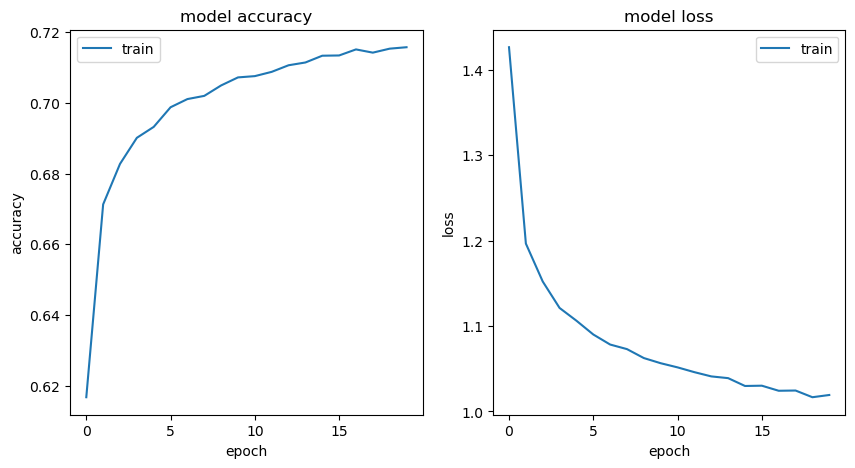

INFO:tensorflow:Assets written to: C:/Users/mona/Desktop/Results/modelnet40v2/ResNet152/20epochs/ResNet152_stage2_FCN.model\assets
Epoch 1/10
6152/6152 - 366s - loss: 0.9434 - accuracy: 0.7355

Epoch 00001: accuracy improved from -inf to 0.73550, saving model to C:/Users/mona/Desktop/Results/modelnet40v2/ResNet152/30epochs\ResNet152_stage2_FCN.model
INFO:tensorflow:Assets written to: C:/Users/mona/Desktop/Results/modelnet40v2/ResNet152/30epochs\ResNet152_stage2_FCN.model\assets
Epoch 2/10
6152/6152 - 390s - loss: 0.8626 - accuracy: 0.7562

Epoch 00002: accuracy improved from 0.73550 to 0.75623, saving model to C:/Users/mona/Desktop/Results/modelnet40v2/ResNet152/30epochs\ResNet152_stage2_FCN.model
INFO:tensorflow:Assets written to: C:/Users/mona/Desktop/Results/modelnet40v2/ResNet152/30epochs\ResNet152_stage2_FCN.model\assets
Epoch 3/10
6152/6152 - 365s - loss: 0.8442 - accuracy: 0.7607

Epoch 00003: accuracy improved from 0.75623 to 0.76070, saving model to C:/Users/mona/Desktop/Resul

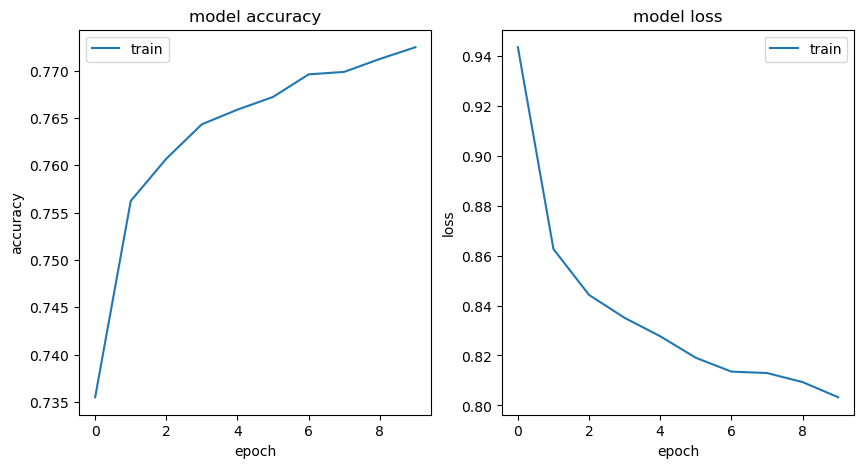

INFO:tensorflow:Assets written to: C:/Users/mona/Desktop/Results/modelnet40v2/ResNet152/30epochs/ResNet152_stage2_FCN.model\assets


In [20]:
######################################## Train FCN: 20 and 30 epochs###################################

#import numpy as np
#from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout

# use a pre-trained CNN to extract features from images in a dataset
# and then feed the resulting feature vectors as input to a new fully-connected network

i=0
for deep_model in all_deep_models:
    model_name = deep_model
    model_name_txt = str(all_model_name_txt[i])
    print ("- Deep model: "+str(model_name_txt))

    FOLD_NAME = str(model_name_txt)+".txt"
    Train_TimeFOLD_NAME = "TrainingTime_FCN_stage2_"+str(model_name_txt)+".txt"
    

# Define a new model as only fully-connected Network (FCN)
    top_model = Sequential()

    # new model as fully-connected network (FCN)
    top_model.add(Dense(1024, activation='relu', input_dim=features)) # this layer is a fully connected layer with 1024 units and a ReLU activation function. The input_dim parameter specifies the input dimension of the layer,
    top_model.add(Dropout(0.5)) #This layer is a dropout layer with a dropout rate of 0.5. Dropout is a regularization technique that randomly drops out (i.e., sets to zero) some of the units in the previous layer during each training epoch. This helps prevent overfitting and improve generalization.
    top_model.add(Dense(40, activation='softmax')) # this layer is a fully connected layer with 40 units and a softmax activation function. The softmax function applies a normalization to the outputs of the previous layer, such that they sum up to one and can be interpreted as probabilities. This layer produces the final output of the network, which is a probability distribution over the 40 possible classes.


    sgd = optimizers.gradient_descent_v2.SGD(lr = learning_rate, momentum=0.9, decay=0.01) # Stochastic gradient descent (often abbreviated SGD)
    # Compile the new model
    top_model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

    print ("# Final model architecture after update")
    top_model.summary()

    print ("# Final model architecture plotted")
    plot_model(top_model, to_file='model_2.png', rankdir='TB',show_dtype=True, show_layer_names=True)
    ploted_model_path = "C:/Users/mona/Desktop/data/model_2.png"  # Image file path
    ploted_model_img = Image.open(ploted_model_path)
    # save the fully-connected network (FCN)
    ploted_model_new_path = "C:/Users/mona/Desktop/Results/"+str(dataset_version)+"/"+str(model_name_txt)+"/"+str(model_name_txt)+"_model_stage2_FCN.png"


    # FCN checkpoints paths
    checkpoint_20_path = "C:/Users/mona/Desktop/Results/"+str(dataset_version)+"/"+str(model_name_txt)+"/"+"20epochs"+"/"+str(model_name_txt)+"_stage2_FCN.model"
    checkpoint_30_path = "C:/Users/mona/Desktop/Results/"+str(dataset_version)+"/"+str(model_name_txt)+"/"+"30epochs"+"/"+str(model_name_txt)+"_stage2_FCN.model"


    ###################### Start Training
    
    checkpoint_20 = ModelCheckpoint(checkpoint_20_path, monitor='accuracy', save_best_only=True, save_weights_only=False, mode='max', verbose=2)
    checkpoint_30 = ModelCheckpoint(checkpoint_30_path, monitor='accuracy', save_best_only=True, save_weights_only=False, mode='max', verbose=2)
    

    STEPS_PER_EPOCH = 5
    train_gen = DataGenerator(all_training_features, categorical_y_train, 32)
    

    start_time = time.time()
    
    # Train the new model on the reshaped feature vectors
    history = top_model.fit(train_gen, batch_size= BATCH_SIZE, epochs= 20, callbacks=[checkpoint_20], verbose=2)
    # Calculate the training time for checkpoint 20 
    training_time_20 = time.time() - start_time
    print("Training time for checkpoint 20: ", training_time_20, " seconds")
    PLOT_NAME = "plot_acc_loss_20epochs_FCN"+".png"
    plot_acc_loss(history, PLOT_NAME, model_name_txt)

    tt = "C:/Users/mona/Desktop/Results/"+str(dataset_version)+"/"+str(model_name_txt)+"/"+"20epochs"+"/"+Train_TimeFOLD_NAME
    f = open(tt, "w")
    f.write("\n"+str(training_time_20))
    f.close()
    top_model.save(checkpoint_20_path)

    # Continue training your model for the next 10 epochs (TOTAL 30), starting from the previously trained model
    top_model = load_model(checkpoint_20_path)
    history = top_model.fit(train_gen, batch_size= BATCH_SIZE, epochs= 10, callbacks=[checkpoint_30], verbose=2)
    # Calculate the training time for checkpoint 30 
    training_time_30 = time.time() - start_time
    print("Training time for checkpoint 30: ", training_time_30, " seconds")
    PLOT_NAME = "plot_acc_loss_30epochs_FCN"+".png"
    plot_acc_loss(history, PLOT_NAME, model_name_txt)

    tt = "C:/Users/mona/Desktop/Results/"+str(dataset_version)+"/"+str(model_name_txt)+"/"+"30epochs"+"/"+Train_TimeFOLD_NAME
    f = open(tt, "w")
    f.write("\n"+str(training_time_30))
    f.close()
    top_model.save(checkpoint_30_path)

    i+=1

- Deep model: ResNet152
# Final model architecture after update
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 40)                4014120   
Total params: 4,014,120
Trainable params: 4,014,120
Non-trainable params: 0
_________________________________________________________________
# Final model architecture plotted


c:\Users\mona\anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
6152/6152 - 443s - loss: 0.9221 - accuracy: 0.7510

Epoch 00001: accuracy improved from -inf to 0.75103, saving model to C:/Users/mona/Desktop/Results/modelnet40v2/ResNet152/20epochs\ResNet152_stage2_FCL.model
INFO:tensorflow:Assets written to: C:/Users/mona/Desktop/Results/modelnet40v2/ResNet152/20epochs\ResNet152_stage2_FCL.model\assets
Epoch 2/20
6152/6152 - 404s - loss: 0.6857 - accuracy: 0.8034

Epoch 00002: accuracy improved from 0.75103 to 0.80342, saving model to C:/Users/mona/Desktop/Results/modelnet40v2/ResNet152/20epochs\ResNet152_stage2_FCL.model
INFO:tensorflow:Assets written to: C:/Users/mona/Desktop/Results/modelnet40v2/ResNet152/20epochs\ResNet152_stage2_FCL.model\assets
Epoch 3/20
6152/6152 - 384s - loss: 0.6503 - accuracy: 0.8123

Epoch 00003: accuracy improved from 0.80342 to 0.81232, saving model to C:/Users/mona/Desktop/Results/modelnet40v2/ResNet152/20epochs\ResNet152_stage2_FCL.model
INFO:tensorflow:Assets written to: C:/Users/mona/Desktop/Results/mode

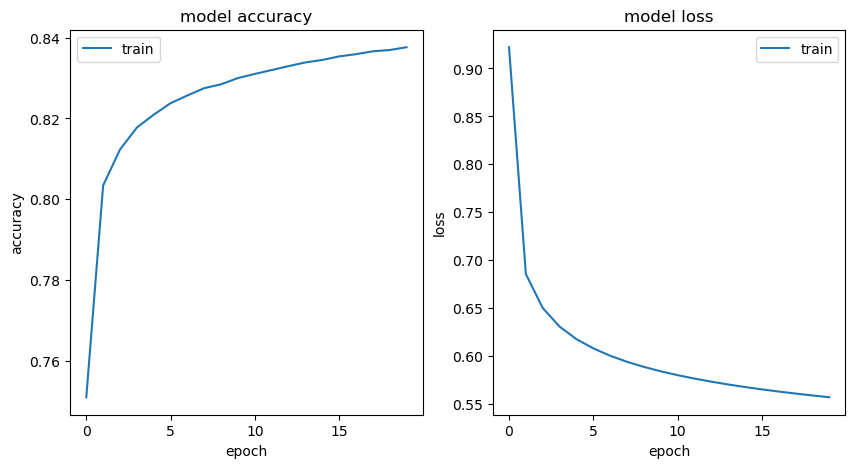

INFO:tensorflow:Assets written to: C:/Users/mona/Desktop/Results/modelnet40v2/ResNet152/20epochs/ResNet152_stage2_FCL.model\assets
Epoch 1/10
6152/6152 - 376s - loss: 0.5482 - accuracy: 0.8396

Epoch 00001: accuracy improved from -inf to 0.83964, saving model to C:/Users/mona/Desktop/Results/modelnet40v2/ResNet152/30epochs\ResNet152_stage2_FCL.model
INFO:tensorflow:Assets written to: C:/Users/mona/Desktop/Results/modelnet40v2/ResNet152/30epochs\ResNet152_stage2_FCL.model\assets
Epoch 2/10
6152/6152 - 344s - loss: 0.4594 - accuracy: 0.8661

Epoch 00002: accuracy improved from 0.83964 to 0.86613, saving model to C:/Users/mona/Desktop/Results/modelnet40v2/ResNet152/30epochs\ResNet152_stage2_FCL.model
INFO:tensorflow:Assets written to: C:/Users/mona/Desktop/Results/modelnet40v2/ResNet152/30epochs\ResNet152_stage2_FCL.model\assets
Epoch 3/10
6152/6152 - 319s - loss: 0.4455 - accuracy: 0.8704

Epoch 00003: accuracy improved from 0.86613 to 0.87038, saving model to C:/Users/mona/Desktop/Resul

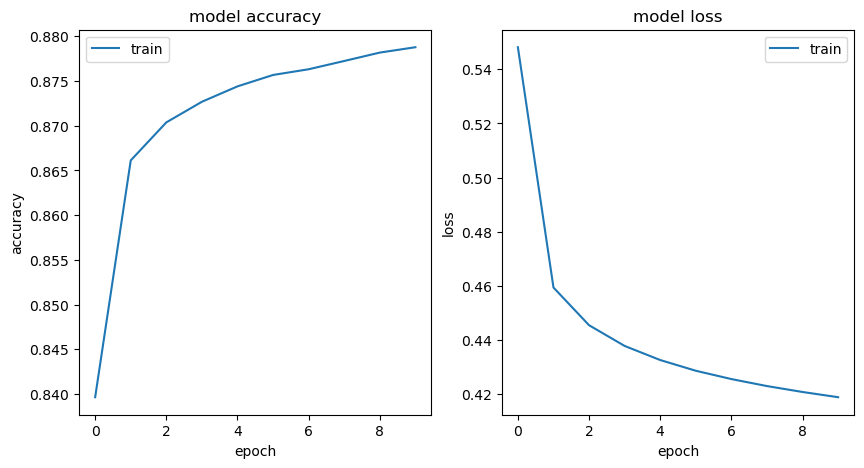

INFO:tensorflow:Assets written to: C:/Users/mona/Desktop/Results/modelnet40v2/ResNet152/30epochs/ResNet152_stage2_FCL.model\assets


In [21]:
######################################## Train FCL: 20 and 30 epochs ###################################

#import numpy as np
#from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout

# use a pre-trained CNN to extract features from images in a dataset
# and then feed the resulting feature vectors as input
# to a new fully-connected network

i=0
for deep_model in all_deep_models:
    model_name = deep_model
    model_name_txt = str(all_model_name_txt[i])
    print ("- Deep model: "+str(model_name_txt))

    FOLD_NAME = str(model_name_txt)+".txt"
    Train_TimeFOLD_NAME = "TrainingTime_FCL_stage2_"+str(model_name_txt)+".txt"
    



# Define a new model as only fully-connected Layer (FCL)
    top_model = Sequential()

    # new model as only one fully-connected layer (FCL)
    top_model.add(Dense(40, activation='softmax', input_dim=features)) 

    sgd = optimizers.gradient_descent_v2.SGD(lr = learning_rate, momentum=0.9, decay=0.01) # Stochastic gradient descent (often abbreviated SGD)
    # Compile the new model
    top_model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

    print ("# Final model architecture after update")
    top_model.summary()

    print ("# Final model architecture plotted")
    plot_model(top_model, to_file='model_2.png', rankdir='TB',show_dtype=True, show_layer_names=True)
    ploted_model_path = "C:/Users/mona/Desktop/data/model_2.png"  # Image file path
    ploted_model_img = Image.open(ploted_model_path)
    # save the fully-connected layer (FCl)
    ploted_model_new_path = "C:/Users/mona/Desktop/Results/"+str(dataset_version)+"/"+str(model_name_txt)+"/"+str(model_name_txt)+"_model_stage2_FCL.png"
    ploted_model_img.save(ploted_model_new_path) # Image saving to another directory



    # FCL checkpoints paths
    checkpoint_20_path = "C:/Users/mona/Desktop/Results/"+str(dataset_version)+"/"+str(model_name_txt)+"/"+"20epochs"+"/"+str(model_name_txt)+"_stage2_FCL.model"
    checkpoint_30_path = "C:/Users/mona/Desktop/Results/"+str(dataset_version)+"/"+str(model_name_txt)+"/"+"30epochs"+"/"+str(model_name_txt)+"_stage2_FCL.model"

    ###################### Start Training
    checkpoint_20 = ModelCheckpoint(checkpoint_20_path, monitor='accuracy', save_best_only=True, save_weights_only=False, mode='max', verbose=2)
    checkpoint_30 = ModelCheckpoint(checkpoint_30_path, monitor='accuracy', save_best_only=True, save_weights_only=False, mode='max', verbose=2)
    



    STEPS_PER_EPOCH = 5
    train_gen = DataGenerator(all_training_features, categorical_y_train, 32)
    
    start_time = time.time()
    
    # Train the new model on the reshaped feature vectors
    history = top_model.fit(train_gen, batch_size= BATCH_SIZE, epochs= 20, callbacks=[checkpoint_20], verbose=2)
    # Calculate the training time for checkpoint 20 
    training_time_20 = time.time() - start_time
    print("Training time for checkpoint 20: ", training_time_20, " seconds")
    PLOT_NAME = "plot_acc_loss_20epochs_FCL"+".png"
    plot_acc_loss(history, PLOT_NAME, model_name_txt)

    tt = "C:/Users/mona/Desktop/Results/"+str(dataset_version)+"/"+str(model_name_txt)+"/"+"20epochs"+"/"+Train_TimeFOLD_NAME
    f = open(tt, "w")
    f.write("\n"+str(training_time_20))
    f.close()
    top_model.save(checkpoint_20_path)

    
    # Continue training your model for the next 10 epochs (TOTAL 30), starting from the previously trained model
    top_model = load_model(checkpoint_20_path)
    history = top_model.fit(train_gen, batch_size= BATCH_SIZE, epochs= 10, callbacks=[checkpoint_30], verbose=2)
    # Calculate the training time for checkpoint 30 
    training_time_30 = time.time() - start_time
    print("Training time for checkpoint 30: ", training_time_30, " seconds")
    PLOT_NAME = "plot_acc_loss_30epochs_FCL"+".png"
    plot_acc_loss(history, PLOT_NAME, model_name_txt)

    tt = "C:/Users/mona/Desktop/Results/"+str(dataset_version)+"/"+str(model_name_txt)+"/"+"30epochs"+"/"+Train_TimeFOLD_NAME
    f = open(tt, "w")
    f.write("\n"+str(training_time_30))
    f.close()
    top_model.save(checkpoint_30_path)

    i+=1